## Replace this with your name and Section

DS 256 Data Science Programming, Fall 2024

Prof Eatai Roth

## Problem Set 4
Due 11/4/2024 by 5p

### Problem 1
Write a function ```greaterThan(A, lower_lim)``` that takes as an argument a numpy array A and a number lower_lim and returns an array with every entry less than or equal to lower_lim replaced by zero. That is to say, only the numbers strictly greater than lower_lim remain, the rest are 0.

In [18]:
import numpy as np

def greaterThan(A, lower_lim):
    result = np.copy(A)
    result[result <= lower_lim] = 0
    return result


In [20]:
A = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
B = np.array([[-1, 1], [2, -2], [0, 3]])
C = np.array([[101.1, 100, 99.9], [99.8, 100.1, 98.9], [103.2, 99, 98]])

assert np.all(greaterThan(A, 5) == np.array([0, 0, 0, 0, 0, 6, 7, 8, 9]))
assert np.all(greaterThan(B, 0) == np.array([[0, 1], [2, 0], [0, 3]]))
assert np.all(greaterThan(C, 100) == np.array([[101.1, 0, 0], [0, 100.1, 0], [103.2, 0, 0]]))

print("You passed all the tests!")

You passed all the tests!


### Problem 2
Write a function ```subtractMean(A)``` that takes as an input the numpy array and returns the array with the mean of all the values subtracted from every element.

In [14]:
import numpy as np

def subtractMean(A):
    mean_value = np.mean(A)
    return A - mean_value


If the tests below aren't passing, check the values of A, B, and C. These should be the same as in the test for Problem 1. If the values in these arrays have changed, why might that be?

In [16]:
assert np.isclose(subtractMean(A), np.array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.])).all()
assert np.isclose(subtractMean(B), np.array([[-1.5,  0.5],[ 1.5, -2.5],[-0.5,  2.5]])).all()
assert np.isclose(subtractMean(C), np.array([[ 1.1,  0. , -0.1],[-0.2,  0.1, -1.1],[ 3.2, -1. , -2. ]])).all()

print("You passed all the tests!")


You passed all the tests!


### Problem 3

Write a function ```arrayEdges``` that takes as an input an array and returns a 1-D array of all the elements on the edges of the array starting at the upper left corner and working around clockwise. Do not repeat that first element. If the original array is not 2-D, print('Error') and return -1.

*Hint*: Get the shape of the array as height and width, calculate the perimeter (remember not to double count the corners), and make an array of zeros the size of the perimeter. Then fill that array.

*Hint 2*: The length of the shape of a 2-D array is 2.

*Hint 3*: ```dA = A.dtype``` is the data type of A. ```np.zeros().astype(dA)``` creates an array of that type (if A has strings, this will make an array of '0').

In [10]:
import numpy as np

def arrayEdges(A):
    if len(A.shape) != 2:
        print("Error")
        return -1
    height, width = A.shape
    perimeter = 2 * (height + width) - 4
    dA = A.dtype
    edge_elements = np.zeros(perimeter, dtype=dA)
    index = 0
    edge_elements[index:index+width] = A[0, :]
    index += width
    edge_elements[index:index+height-1] = A[1:, -1]
    index += height - 1
    edge_elements[index:index+width-1] = A[-1, -2::-1]
    index += width - 1

    edge_elements[index:index+height-2] = A[-2:0:-1, 0]

    return edge_elements


In [12]:
'''Test your code'''

X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
Y = np.array([['you', 'got', 'this'],['!','correct','problem']])
Z = np.array(['but','this','wont', 'work'])

assert np.array(arrayEdges(X) == np.array([1, 2, 3, 6, 9, 8, 7, 4])).all()
assert np.array(arrayEdges(Y) == np.array(['you', 'got', 'this', 'problem', 'correct', '!'])).all()
assert arrayEdges(Z) == -1

print("You passed all the tests! (disregard that it says Error above...it's supposed to do that)")


Error
You passed all the tests! (disregard that it says Error above...it's supposed to do that)


## Palmer's Penguins

Below I've imported the Palmer's Penguins dataset, courtesy of Alison Horst's github. Fill in the blanks in Problem 4. You should add code cells below to write code to find the answers.

In [ ]:
import pandas as pd

pp_df = pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv')
pp_df.head()

### Problem 4

 1. How many penguins were recorded? 

num_penguins = pp_df.shape[0]
print("Number of penguins recorded:", num_penguins)

 2. In terms of body mass, how big were the smallest and biggest penguins measured?
in_body_mass = pp_df['body_mass_g'].min()
max_body_mass = pp_df['body_mass_g'].max()
print("Smallest penguin body mass:", min_body_mass, "g")
print("Biggest penguin body mass:", max_body_mass, "g")

 4. What species of penguins were recorded and how many of each?

species_counts = pp_df['species'].value_counts()
print("Species and their counts:")
print(species_counts)

In [45]:
'''your code here'''
num_penguins = pp_df.shape[0]
print("Number of penguins recorded:", num_penguins)

min_body_mass = pp_df['body_mass_g'].min()
max_body_mass = pp_df['body_mass_g'].max()
print("Smallest penguin body mass:", min_body_mass, "g")
print("Biggest penguin body mass:", max_body_mass, "g")

species_counts = pp_df['species'].value_counts()
print("Species and their counts:")
print(species_counts)

Number of penguins recorded: 344
Smallest penguin body mass: 2700.0 g
Biggest penguin body mass: 6300.0 g
Species and their counts:
species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64


### Problem 5

Plot a histogram of the body masses of penguins grouped by species. Make sure to include a title, axis labels, and a legend.

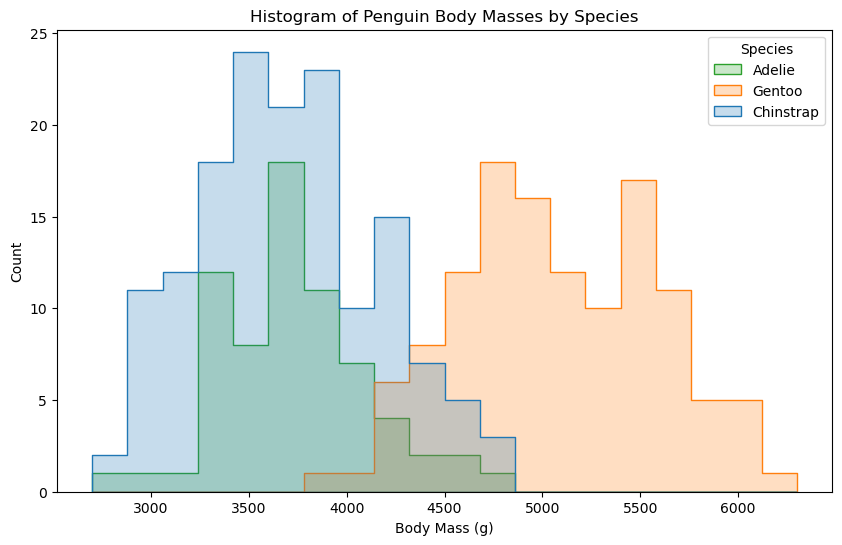

In [23]:
'''your code here'''
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pp_df = pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv')

plt.figure(figsize=(10, 6))
sns.histplot(data=pp_df, x="body_mass_g", hue="species", element="step", bins=20)

plt.title("Histogram of Penguin Body Masses by Species")
plt.xlabel("Body Mass (g)")
plt.ylabel("Count")

plt.legend(title="Species", labels=pp_df['species'].dropna().unique())

plt.show()

### Challenge Problem

Write a function ```interleaveArrays``` that takes as arguments two numpy arrays A and B and return a new numpy array with the rows of A and B interleaved, starting with A. If you run out of rows from one matrix or the other complete the array with the remaining rows of the longer array.

If the two arrays do not have the same number of columns, print('Error: Shapes of arrays are not compatible.') and return -1
If the two arrays contain different data types, print('Error: Types of arrays are not compatible.') and return -2

Example:

```
G = np.array([[1, 2, 3], [4, 5, 6]])
H = np.array([[10, 20, 30], [100, 200, 300], [1000, 2000, 3000]])

interleave(G,H)
```
returns
```
array([[1,2,3], [10,20,30], [4, 5, 6], [100, 200, 300], [1000, 2000, 3000]])
```

In [31]:
import numpy as np

def interleaveArrays(A, B):
 
    if A.shape[1] != B.shape[1]:
        print('Error: Shapes of arrays are not compatible.')
        return -1
    
   
    if A.dtype != B.dtype:
        print('Error: Types of arrays are not compatible.')
        return -2

   
    num_rows = A.shape[0] + B.shape[0]
    
   
    interleaved_list = []

  
    i, j = 0, 0
    while i < A.shape[0] or j < B.shape[0]:
        if i < A.shape[0]:  
            interleaved_list.append(A[i])
            i += 1
        if j < B.shape[0]: 
            interleaved_list.append(B[j])
            j += 1

   
    interleaved_array = np.array(interleaved_list, dtype=A.dtype)
    return interleaved_array


G = np.array([[1, 2, 3], [4, 5, 6]])
H = np.array([[10, 20, 30], [100, 200, 300], [1000, 2000, 3000]])


result = interleaveArrays(G, H)
print(result)



[[   1    2    3]
 [  10   20   30]
 [   4    5    6]
 [ 100  200  300]
 [1000 2000 3000]]
